<a href="https://colab.research.google.com/github/YAGNESWAR-825/codesoft/blob/main/image_caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install tensorflow pillow numpy matplotlib


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


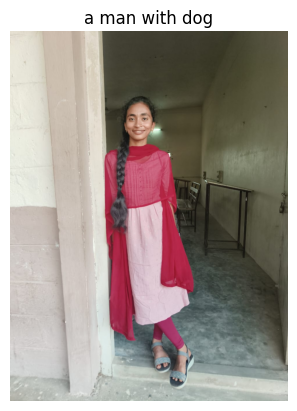

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.word_index = {'startseq': 1, 'endseq': 2, 'a': 3, 'man': 4, 'with': 5, 'dog': 6}
index_word = {v: k for k, v in tokenizer.word_index.items()}

def dummy_caption_model(features):
    return 'startseq a man with dog endseq'
def extract_features(img_path):
    model = ResNet50(weights='imagenet')
    model = Model(inputs=model.input, outputs=model.layers[-2].output)  # Remove last layer
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features


def generate_caption(features):
    caption = dummy_caption_model(features)
    caption = caption.replace('startseq ', '').replace(' endseq', '')
    return caption
def caption_image(img_path):
    features = extract_features(img_path)
    caption = generate_caption(features)

    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(caption)
    plt.show()

caption_image("/content/WhatsApp Image 2025-06-04 at 21.41.01 (4).jpeg")  # Replace with your image path
